In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('station_hour.csv')

C:\Users\Naveen\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df = df.dropna()

In [4]:
df.shape

(203693, 16)

In [5]:
df.head()

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
16,AP001,2017-11-25 09:00:00,104.00,148.50,1.93,23.00,13.75,9.80,0.1,15.30,117.62,0.30,10.40,0.23,155.0,Moderate
17,AP001,2017-11-25 10:00:00,94.50,142.00,1.33,16.25,9.75,9.65,0.1,17.00,136.23,0.28,7.10,0.15,159.0,Moderate
18,AP001,2017-11-25 11:00:00,82.75,126.50,1.47,14.83,9.07,9.70,0.1,15.40,149.92,0.20,4.55,0.08,173.0,Moderate
21,AP001,2017-11-25 14:00:00,68.50,117.00,1.35,13.60,8.35,7.40,0.1,21.80,161.70,0.10,2.30,0.00,191.0,Moderate
22,AP001,2017-11-25 15:00:00,69.25,112.25,1.52,11.80,7.55,9.25,0.1,21.38,161.68,0.10,2.35,0.00,191.0,Moderate


In [6]:
df.corr()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
PM2.5,1.000000,0.847882,0.350274,0.471717,0.460089,0.282144,0.482322,0.162077,-0.043815,0.118233,0.208731,0.119178,0.786344
PM10,0.847882,1.000000,0.349677,0.507047,0.480890,0.273858,0.476773,0.195957,-0.050060,0.124158,0.217442,0.140978,0.757663
NO,0.350274,0.349677,1.000000,0.334167,0.869167,0.121156,0.452428,0.012008,-0.182378,0.326802,0.268071,0.140198,0.288469
NO2,0.471717,0.507047,0.334167,1.000000,0.661776,0.249797,0.435610,0.152927,-0.181512,0.124333,0.304510,0.227683,0.441733
NOx,0.460089,0.480890,0.869167,0.661776,1.000000,0.206121,0.531523,0.057293,-0.222290,0.372315,0.346906,0.194476,0.426584
NH3,0.282144,0.273858,0.121156,0.249797,0.206121,1.000000,0.163425,0.188046,-0.059098,0.073616,0.063883,0.029148,0.283593
CO,0.482322,0.476773,0.452428,0.435610,0.531523,0.163425,1.000000,0.113498,-0.137411,0.198691,0.221141,0.162400,0.432508
SO2,0.162077,0.195957,0.012008,0.152927,0.057293,0.188046,0.113498,1.000000,0.076843,-0.006602,0.107354,0.095866,0.135806
O3,-0.043815,-0.050060,-0.182378,-0.181512,-0.222290,-0.059098,-0.137411,0.076843,1.000000,-0.110100,-0.121331,-0.074684,0.094589
Benzene,0.118233,0.124158,0.326802,0.124333,0.372315,0.073616,0.198691,-0.006602,-0.110100,1.000000,0.631691,0.146465,0.125644


In [7]:
df=df[['PM2.5','PM10','NO2','NOx','CO','AQI']]

In [8]:
df = df.head(50000)

In [39]:
df.head()

,PM2.5,PM10,NO2,NOx,CO,AQI
16,104.00,148.50,23.00,13.75,0.1,155.0
17,94.50,142.00,16.25,9.75,0.1,159.0
18,82.75,126.50,14.83,9.07,0.1,173.0
21,68.50,117.00,13.60,8.35,0.1,191.0
22,69.25,112.25,11.80,7.55,0.1,191.0


In [9]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [11]:
y_train.shape

(40000,)

In [12]:
y_train = y_train.reshape(len(y_train),1)
y_test = y_test.reshape(len(y_test),1)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
y_train = sc_y.fit_transform(y_train)


In [22]:
from sklearn.neighbors import KNeighborsRegressor
error_rate = []
# Will take some time
for i in range(1,80):
 
 knn = KNeighborsRegressor(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = sc_y.inverse_transform(knn.predict(X_test))
 
 from sklearn.metrics import mean_squared_error
 a = mean_squared_error(y_test, pred_i)
 print('For k = ',i," ",a)
 error_rate.append(a)

For k =  1   3389.3911
For k =  2   2580.466125
For k =  3   2314.4140999999995
For k =  4   2171.661975
For k =  5   2111.798128
For k =  6   2051.552333333333
For k =  7   2019.5171530612245
For k =  8   2009.5077265625
For k =  9   1991.9868419753086
For k =  10   1979.159046
For k =  11   1972.501829752066
For k =  12   1973.1548666666665
For k =  13   1969.4976360946744
For k =  14   1969.7097668367348
For k =  15   1968.9473555555555
For k =  16   1964.121466796875
For k =  17   1962.4245660899653
For k =  18   1960.9425314814816
For k =  19   1965.1870908587255
For k =  20   1961.5400802500003
For k =  21   1963.0225671201813
For k =  22   1959.2344700413223
For k =  23   1962.7391901701324
For k =  24   1960.6464026041667
For k =  25   1957.7478116799998
For k =  26   1957.774502218935
For k =  27   1956.913339506173
For k =  28   1959.127407015306
For k =  29   1961.2125747919147
For k =  30   1964.2777968888886
For k =  31   1966.0365735691987
For k =  32   1967.2646112304687

Text(0, 0.5, 'Error Rate')

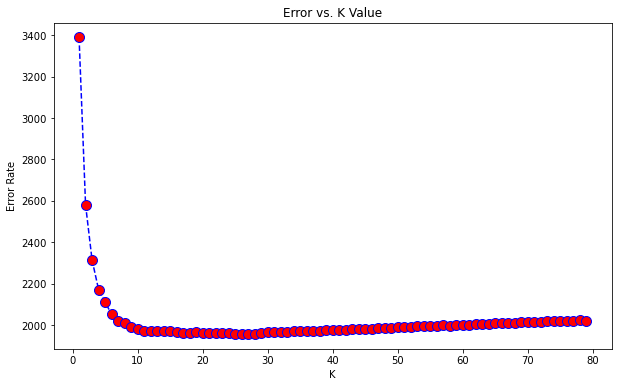

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,80),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [34]:
regressor = KNeighborsRegressor(n_neighbors =28 )
regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=28)

In [35]:
y_pred = sc_y.inverse_transform(regressor.predict(X_test))

In [36]:
a = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)

In [37]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7555077396576632

In [38]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

1959.127407015306